<a href="https://colab.research.google.com/github/RafaelVillasmil/BIOF309_Introduction_to_Python/blob/main/RafaelV_unit_4_notebook_4c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 4 - Instructional DEMO 4c: Modules and Packages.
 - **Focus:** Lets get using modules and packages common in basic biomedical data science. 
 - **Author(s):** Sara B-C.
 - **Date Notebook Last Modified:** 08.16.2020
 - **Quick Description:** Use this notebook to get experience with common python libraries and packages used in biomedical data science. In the beginning, just hit play at each cell and watch things work. Once you are done, you can download the finished results. **There are some exercises to complete at the end!**

---
## Code outline
  0. Set up file stream (yep, this is in every notebook).
  1. Handling files
  2. Use `PIP` to install and upgrade `pandas`, then get familiar with it as an intro.
  3. Merge data.
  4. Summarize the data.   
  5. Run a simple logistic regression model.
  6. Make a basic plot

---
## Additional notes
*  Pandas will become your best friend if you keep doing science in the biomedical field.

## 0. Lets set up filestream access
Follow the directions on screen as you run the code cell below and then you can access the data stored on your 'My Drive'. For many of you, this is the first python code you will ever execute knowingly, as most google infrastructure is python based (another reason why the language is growing)... You did this before, let's go!

In [17]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/BINF309_Introduction_to_Python/example_data/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Above you should now see the output "Mounted at /content/drive/". This means your storage is now connected to your notebook and its runtime. A runtime is the computer it will use to execute code and other computations. We'll cover what the above code means once you have learned some more python.

## 1. Handling files
Python has several functions for creating, reading, updating, and deleting files. The main functions for working with files is "open - filename, mode"
    ## Read ("r") (default) Opens a file for reading. Will return error if the file doesn't exist
    ## Append ("a") Opens a file and adds text to the end. Will create the file if it doesn't exist
    ## Write ("w")  Opens a file and overwrites existing text. Will create the file if it doesn't exist
    ## Create ("x") Creates a file with filename. Returns an error if the file DOES exist

In [18]:
import os
file = open("testfileSara.txt", "x") # Here I am creating a new file. Remember, you can only create this file once. If you click twice, you will get an error since the file is already created

FileExistsError: ignored

In [21]:
file = open("testfileSara.txt", "w") # Here I am overwriting the content of this file
file.write("Name:Anna\n" + "Color:black\n" + "Food:chips\n" + "Animal:cat\n" + "Number:10\n") # It stores name at the top with your favorite color, food, animal, and number

54

In [22]:
! head testfileSara.txt

Name:Anna
Color:black
Food:chips
Animal:cat
Number:10


In [35]:
file = open("testfileSara.txt", "a")           # Opens the file in order to add text to it
file.write("Now the file has more stuff!")

28

In [36]:
! head testfileSara.txt

Name:Anna
Color:black
Food:chips
Animal:cat
Number:10
Now the file has more stuff!

## 2. Use `PIP` to install and upgrade `pandas`, then get familiar with it as an intro.
Load data into a pandas data frame.
Here we are loading two different files, a file containing clinical and demographic information, and a file containing a phenotype file for Parkinson's disease from a simulated dataset.


In [37]:
! pip install pandas # Install pandas using PIP.
! pip install --upgrade pandas # Upgrade pandas using PIP.

In [ ]:
! ls /content/drive/My\ Drive/FAES_BIOF309/example_data/discrete # Quick exploration of directory structure.

In [39]:
import pandas as pd # Import pandas, we'll alias as `pd` so we don't need to keep typing the whole name of the package.

outcome_df = pd.read_csv("/content/drive/My Drive/BINF309_Introduction_to_Python/example_data/discrete/training_pheno.csv", engine='c') # The engine option speeds the data ingest up.

exposure_df = pd.read_csv("/content/drive/My Drive/BINF309_Introduction_to_Python/example_data/discrete/training_addit.csv", engine='c') # The engine option speeds the data ingest up.

In [40]:
outcome_df.head() # You might remember this command from a preview earlier in the course.

,ID,PHENO
0,sample1,1
1,sample2,1
2,sample3,1
3,sample4,0
4,sample5,0


In [41]:
exposure_df.head() # You might remember this command from a preview earlier in the course.

,ID,SEX_COV,AGE,UPSIT,FAMILY_HISTORY
0,sample1,1,63,33,0
1,sample2,0,75,32,0
2,sample3,0,59,15,0
3,sample4,0,58,36,1
4,sample5,0,57,32,0


## 3. Merge data.
Lets merge the two files into a single file for analysis. We'll do an inner merge, keeping only samples with overlapping `ID` information to make a dataframe we call `analysis_df`.




In [42]:
analysis_df = pd.merge(outcome_df, exposure_df, how='inner', on='ID')

In [43]:
analysis_df.head()

,ID,PHENO,SEX_COV,AGE,UPSIT,FAMILY_HISTORY
0,sample1,1,1,63,33,0
1,sample2,1,0,75,32,0
2,sample3,1,0,59,15,0
3,sample4,0,0,58,36,1
4,sample5,0,0,57,32,0


In [44]:
# This can also be done with dot chaining.
analysis_dot_df = outcome_df.merge(exposure_df, how='inner', on='ID')
analysis_dot_df.head()

,ID,PHENO,SEX_COV,AGE,UPSIT,FAMILY_HISTORY
0,sample1,1,1,63,33,0
1,sample2,1,0,75,32,0
2,sample3,1,0,59,15,0
3,sample4,0,0,58,36,1
4,sample5,0,0,57,32,0


## 4. Summarize the data.
More details on this in the next module focusing on `pandas` and data exploration.


In [45]:
# This gives a nice general summary of your data.
analysis_df.describe() # Note, you are lucky and there is no missing data or `NaN`.

,PHENO,SEX_COV,AGE,UPSIT,FAMILY_HISTORY
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.684000,0.338000,64.156000,26.068000,0.184000
std,0.465379,0.473502,9.979321,9.235039,0.387872
min,0.000000,0.000000,34.000000,1.000000,0.000000
25%,0.000000,0.000000,58.000000,18.000000,0.000000
50%,1.000000,0.000000,65.000000,27.500000,0.000000
75%,1.000000,1.000000,72.000000,34.000000,0.000000
max,1.000000,1.000000,87.000000,40.000000,1.000000


## 5. Run a simple logistic regression model.


In [46]:
import statsmodels.api as sm # Let's import the statsmodels API as `sm` for short.
this_formula = "PHENO ~ UPSIT + FAMILY_HISTORY + SEX_COV + AGE" # Specify your formula.
res = sm.formula.glm(formula=this_formula, family=sm.families.Binomial(), data=analysis_df).fit() # Build the logistic model.
res.summary() # Summarize the results. You have built a solid model, that shows a very strong predictive value for Parkinson's, see Nalls 2015 for more details.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  PHENO   No. Observations:                  500
Model:                            GLM   Df Residuals:                      495
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -175.11
Date:                Sun, 27 Feb 2022   Deviance:                       350.21
Time:                        23:18:32   Pearson chi2:                     523.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.3754      1.410      8.070      0.000       8.613      14.138
UPSIT             -0.2947      0.029    -10.077      0.000      -0.352      -0.237
FAMILY_HISTORY     1.2765      0.457      2.794      0.005       0.381       2.172
SEX_COV            0.6616      0.284      2.330      0.020       0.105       1.218
AGE               -0.0350      0.013     -2.593      0.010      -0.061      -0.009
==================================================================================
"""

## 6. Make a basic plot.
This is an intro, a lot more to come with data vizualization later! A taste of cool things to come in the next few classes.


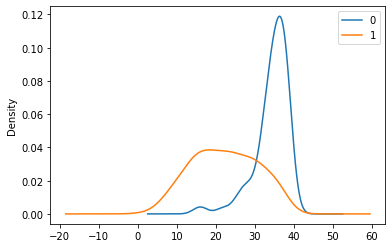

In [47]:
import matplotlib.pyplot as plt # Let's import matplot, a great graphics package.

analysis_df.groupby([analysis_df['PHENO']]).UPSIT.plot.kde() # This plots the density of the UPSIT score by values of the PHENO column.
plt.legend() # This adds a legend to the plot.

**Makes sense, now on to some exercises ...**

# Unit 4 - Assignment #4c
***Come here to prove your knowledge.***

Text cells will indicate a task.  
Write your commands in the empty code cells below them.

## 1. Import a package and give it an alias.

In [15]:
import statsmodels as sm # Import statsmodels with 'sm' allias 

## 2. Upgrade the package.

In [48]:
! pip install --upgrade statsmodels # Upgrade statsmodels using PIP.

     |████████████████████████████████| 9.8 MB 14.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


## 3. Read in the CSV file `example_GWAS.csv`.

In [8]:
example_GWAS = pandas.read_csv("/content/drive/My Drive/BINF309_Introduction_to_Python/example_data/continuous/example_GWAS.csv", engine='c')

## 4. Look at the first few lines of the file you just read in.

In [9]:
example_GWAS.head()

,SNP,A1,A2,freq,b,se,p,N
0,snp1,A,G,0.85,-0.08,0.0130,1.050000e-09,100000
1,snp2,A,G,0.22,0.08,0.0113,1.570000e-11,100000
2,snp3,T,C,0.69,0.07,0.0101,3.410000e-13,100000
3,snp4,A,G,0.88,0.09,0.0145,2.120000e-09,100000
4,snp5,T,G,0.21,0.11,0.0117,6.260000e-20,100000


## 5. Summarize the file you just read in exercise 3.

In [12]:
example_GWAS.describe()

,freq,b,se,p,N
count,500.000000,500.00000,500.000000,5.000000e+02,500.0
mean,0.453900,0.00762,0.016496,3.748001e-01,100000.0
std,0.316457,0.12584,0.010818,3.245665e-01,0.0
min,0.000000,-0.75000,0.009300,3.890000e-154,100000.0
25%,0.150000,-0.01000,0.010075,3.974000e-02,100000.0
50%,0.415000,0.00000,0.011900,3.188000e-01,100000.0
75%,0.730000,0.02000,0.017825,6.782500e-01,100000.0
max,1.000000,2.43000,0.093700,9.981000e-01,100000.0


# Thanks, see you in the next unit!